In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


###  Rating average/count by day

In [2]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


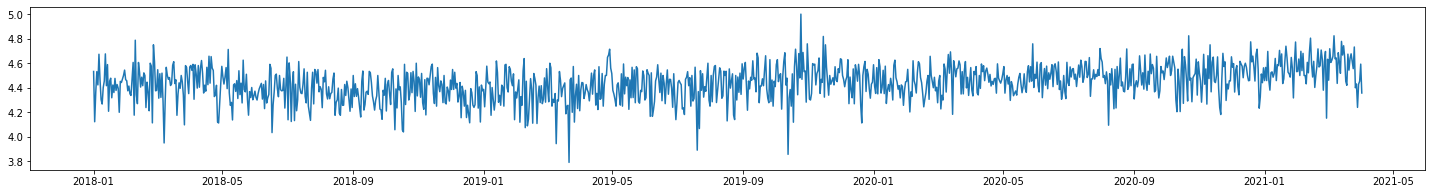

In [3]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()

plt.figure(figsize = (25, 3))
plt.plot(day_average.index, day_average['Rating'])

In [4]:
day_average['Rating'].max()

5.0

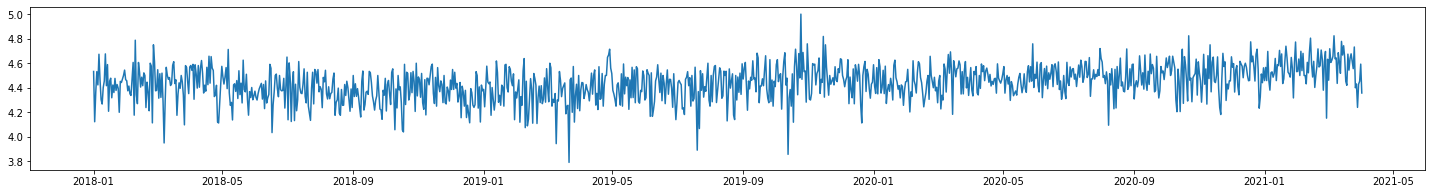

In [5]:
plt.figure(figsize = (25, 3))
plt.plot(day_average.index, day_average['Rating'])

### Rating average by week

In [6]:
data['Week'] = data['Timestamp'].dt.week
data

<ipython-input-6-7a56e2678be6>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Timestamp'].dt.week


,Course Name,Timestamp,Rating,Comment,Day,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,13
...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,1


In [7]:
data['Week'].max()

53

In [8]:
data['Week'].min()

1

In [9]:
data['Week'] = data['Timestamp'].dt.strftime('%m %U')
data['Week']

0        04 13
1        04 13
2        04 13
3        04 13
4        04 13
         ...  
44995    01 00
44996    01 00
44997    01 00
44998    01 00
44999    01 00
Name: Week, Length: 45000, dtype: object

#### %m - month, %Y - year, %U - week, %A - week name

In [10]:
data['Week'] = data['Timestamp'].dt.strftime('%m %U')
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
01 00,4.441687
01 01,4.438031
01 02,4.452529
01 03,4.484821
01 04,4.449617
...,...
12 48,4.494758
12 49,4.412752
12 50,4.409753


### Rating average by week

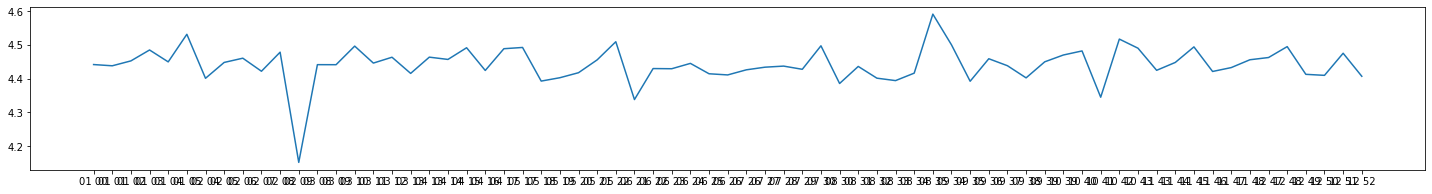

In [11]:
data['Week'] = data['Timestamp'].dt.strftime('%m %U')
week_average = data.groupby(['Week']).mean()

plt.figure(figsize = (25, 3))
plt.plot(week_average.index, week_average['Rating'])

### Average rating by month

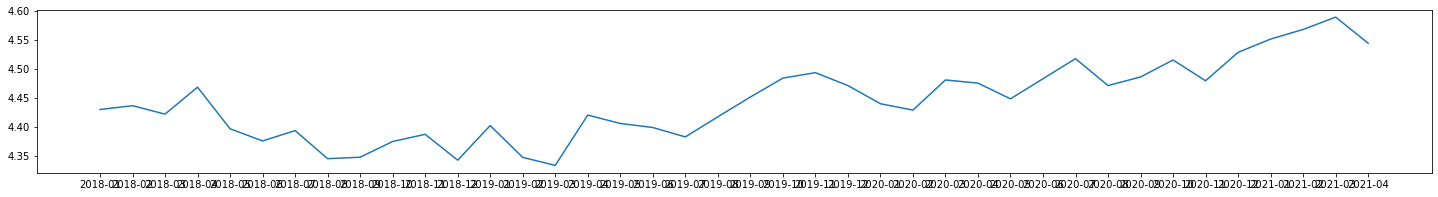

In [12]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()

plt.figure(figsize = (25, 3))
plt.plot(month_average.index, month_average['Rating'])

### Average rating by month by course

In [13]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_crs[-20:]

Rating
Month   Course Name                                                 
2021-01 The Python Mega Course: Build 10 Real World App...  4.555494
2021-02 100 Python Exercises I: Evaluate and Improve Yo...  4.450000
        100 Python Exercises II: Evaluate and Improve Y...  4.562500
        Data Processing with Python                         3.733333
        Interactive Data Visualization with Python and ...  4.238095
        Python for Beginners with Examples                  4.516667
        The Complete Python Course: Build 10 Profession...  4.656463
        The Python Mega Course: Build 10 Real World App...  4.583846
2021-03 100 Python Exercises I: Evaluate and Improve Yo...  4.190476
        100 Python Exercises II: Evaluate and Improve Y...  4.750000
        Data Processing with Python                         4.038462
        Interactive Data Visualization with Python and ...  4.500000
        Learn GIS in One Hour                               4.250000
        Python for Beginners with Examples                  4.333333
        The Complete Python Course: Build 10 Profession...  4.570470
        The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

In [14]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs[-20:]

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2019-09                                               4.631579          
2019-10                                               4.000000          
2019-11                                               4.571429          
2019-12                                               4.625000          
2020-01                                               4.409091          
2020-02                                               4.000000          
2020-03                                               4.562500          
2020-04                                               4.538462          
2020-05                                               4.568182          
2020-06                                               4.500000          
2020-07                                               4.214286          
2020-08                                               4.625000          
2020-09                                               4.576923          
2020-10                                               4.500000          
2020-11                                               4.687500          
2020-12                                               4.937500          
2021-01                                               4.700000          
2021-02                                               4.562500          
2021-03                                               4.750000          
2021-04                                                    NaN          

                                         \
Course Name Data Processing with Python   
Month                                     
2019-09                        4.291667   
2019-10                        4.260000   
2019-11                        4.361111   
2019-12                        4.104167   
2020-01                        4.068966   
2020-02                        4.296875   
2020-03                        4.397059   
2020-04                        4.078431   
2020-05                        4.016949   
2020-06                        4.178571   
2020-07                        4.386364   
2020-08                        4.578947   
2020-09                        4.404762   
2020-10                        4.6000

<AxesSubplot:xlabel='Month'>

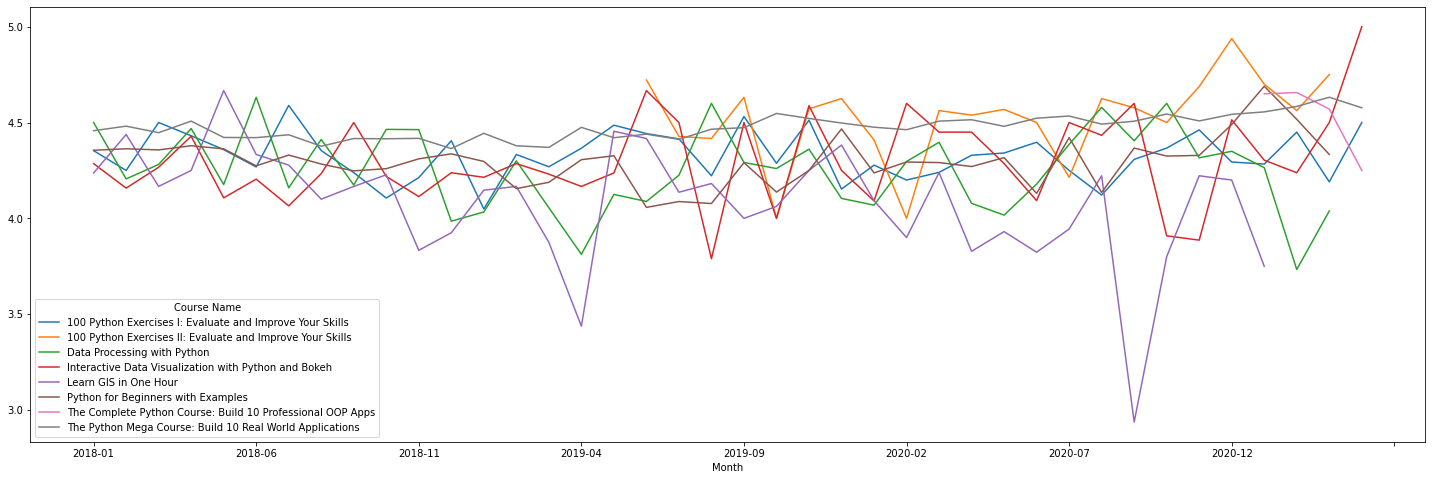

In [15]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()

month_average_crs.plot(figsize=(25, 8))

<AxesSubplot:xlabel='Month'>

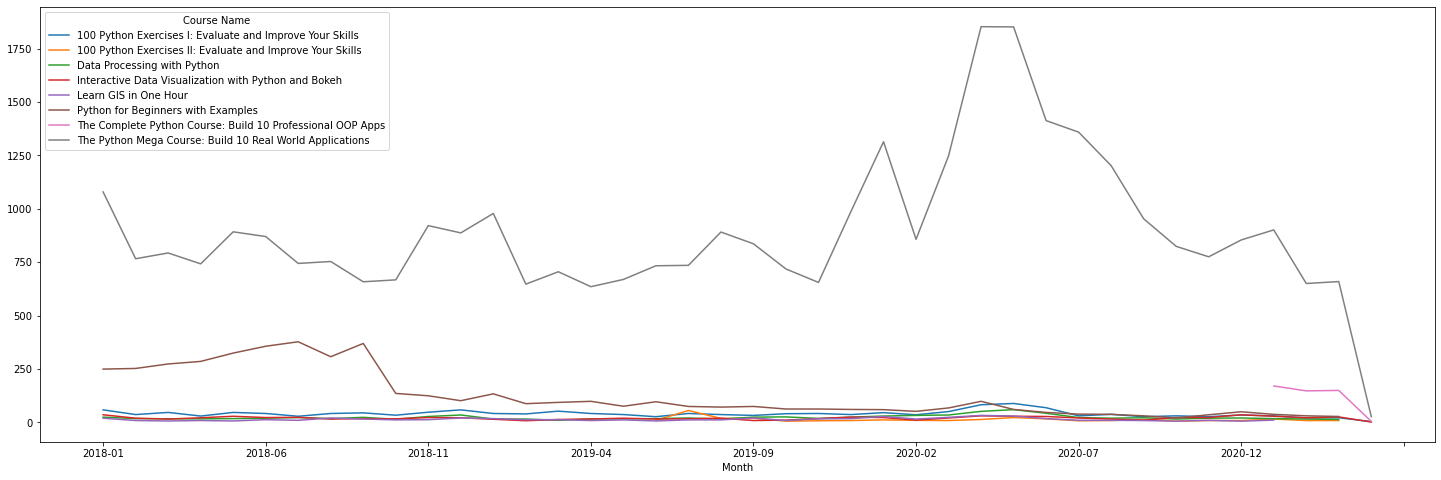

In [16]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize=(25, 8))

In [26]:
month_average_crs.columns[1]

'100 Python Exercises II: Evaluate and Improve Your Skills'

In [17]:
month_average_crs

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,58.0,NaN,24.0,35.0,19.0,249.0,NaN,1079.0
2018-02,36.0,NaN,17.0,19.0,8.0,252.0,NaN,766.0
2018-03,46.0,NaN,16.0,15.0,6.0,273.0,NaN,793.0
2018-04,29.0,NaN,16.0,21.0,8.0,285.0,NaN,742.0
2018-05,46.0,NaN,17.0,28.0,6.0,324.0,NaN,892.0
2018-06,41.0,NaN,19.0,22.0,12.0,356.0,NaN,870.0
2018-07,28.0,NaN,22.0,23.0,9.0,377.0,NaN,744.0
2018-08,41.0,NaN,17.0,15.0,20.0,307.0,NaN,753.0
2018-09,44.0,NaN,23.0,17.0,15.0,369.0,NaN,658.0


### What day are people are happiest

In [18]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')

weekday_average = data.groupby(['Weekday']).mean()
weekday_average

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


In [19]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average

,,Rating
Weekday,Daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


In [20]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average.index.get_level_values(0)

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Weekday')

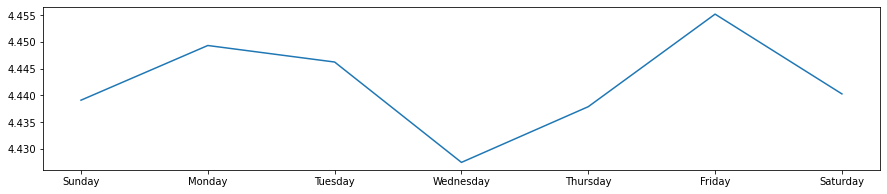

In [21]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

plt.figure(figsize = [15, 3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

### Number of ratings by course

In [22]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

In [23]:
share = data.groupby(['Course Name'])['Rating'].count()
share.index

Index(['100 Python Exercises I: Evaluate and Improve Your Skills',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Data Processing with Python',
       'Interactive Data Visualization with Python and Bokeh',
       'Learn GIS in One Hour', 'Python for Beginners with Examples',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       'The Python Mega Course: Build 10 Real World Applications'],
      dtype='object', name='Course Name')

([<matplotlib.patches.Wedge at 0x219c87daa00>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

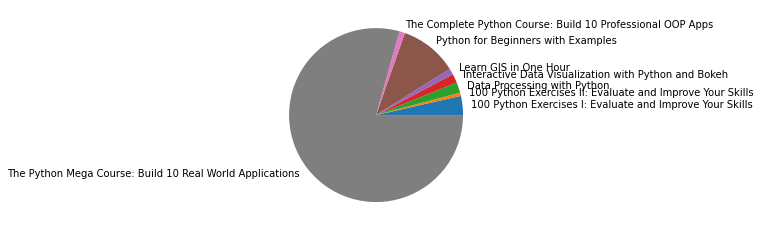

In [24]:
plt.pie(share, labels = share.index)